In [226]:
from itertools import product
from fishproviz.utils.error_filter import error_default_points
import fishproviz as fish
from data_factory.processing import *
from data_factory.utils import *
from data_factory.correlations import *
from repeatability.repeatability import *
import matplotlib as mpl
import sys
sys.path.append("../Fish-Traking_Visualization")
mpl.use("MacOSX")
%load_ext autoreload
%autoreload 2
%load_ext line_profiler  
parameters = set_parameters()
DAYS = get_days(parameters)
FISH_KEYS = get_individuals_keys(parameters)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler
Skipping, path already exists : /Volumes/Extreme_SSD/content/Fish_moves_final
Skipping, path already exists : /Volumes/Extreme_SSD/content/Fish_moves_final/Projections
Skipping, path already exists : /Volumes/Extreme_SSD/content/Fish_moves_final/TSNE_Projections
Skipping, path already exists : /Volumes/Extreme_SSD/content/Fish_moves_final/TSNE
Skipping, path already exists : /Volumes/Extreme_SSD/content/Fish_moves_final/UMAP


In [4]:
import pandas as pd
import fishproviz as fish
fks = fish.utils.get_camera_pos_keys()
cam, pos= fks[0].split("_")
days = fish.utils.get_all_days_of_context()
keys, data = fish.utils.csv_of_the_day(cam,days[0],pos == "back")
#data[0]

In [21]:
res = fish.metrics.activity_per_interval(fish_ids=[1,2], time_interval=8*60**2)

In [31]:
(8*5*60**2+6000)

150000

In [15]:
results = res["results"]

In [16]:
df_sum = pd.concat([pd.concat([
    pd.DataFrame(d, index=None) 
    for d in data.values()], keys=data.keys()) 
                    for data in results.values()], keys=results.keys()).reset_index()

In [56]:
df_sum.to_csv("example.csv")

In [81]:
df_sum.columns=["fish_key", "day", "hour", "mean", "std", "nd"]

In [17]:
df_sum

,level_0,level_1,level_2,0,1,2
0,23484201_back,20220712_060000,0,0.248439,0.371000,143900.0
1,23484201_back,20220712_060000,1,0.170772,0.384461,5973.0
2,23484201_back,20220713_060000,0,0.291703,0.456550,143912.0
3,23484201_back,20220713_060000,1,0.205878,0.393901,5978.0
4,23484201_back,20220714_060000,0,0.120106,0.248299,143116.0
...,...,...,...,...,...,...
59,23484204_back,20220725_060000,1,0.030554,0.254620,5973.0
60,23484204_back,20220726_060000,0,0.023023,0.157746,135355.0
61,23484204_back,20220726_060000,1,0.028068,0.253426,5974.0
62,23484204_back,20220727_060000,0,0.055181,0.199902,116078.0


In [4]:
fish.metrics.results_to_csv.metric_per_hour_csv(**res)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [314]:
import repeatability.sampling as r_sampling
r_sampling.binning_days(5)

array([ 0,  5, 11, 16, 22, 28])

In [297]:
matrix = pd.read_csv(parameters.projectPath+"/avg_step_by_%dmin.csv"%nmin,index_col=0)

In [298]:
meld_matrix = get_melted_table(matrix)

In [337]:
true_rep = repeatability_t(meld_matrix)
true_rep

0.2513158011186388

In [344]:
sample_t = r_sampling.sample_days_mins(meld_matrix, 28)

In [347]:
rep, lmm = repeatability_lmm(sample_t)

In [350]:
lmm.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:            MixedLM Dependent Variable: step     
No. Observations: 1242    Method:             REML     
No. Groups:       45      Scale:              0.0647   
Min. group size:  26      Log-Likelihood:     -122.1379
Max. group size:  28      Converged:          Yes      
Mean group size:  27.6                                 
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     0.183    0.050  3.642 0.000  0.085  0.282
1 | id_cat    0.005    0.003  1.306 0.192 -0.002  0.011
block_cat    -0.045    0.091 -0.499 0.618 -0.223  0.133
Group Var     0.021    0.020                           
=======================================================

"""

In [328]:
res=r_sampling.repeatability_sampling(meld_matrix, 100,n_sample_list, False)

In [340]:
res_t=r_sampling.repeatability_sampling(meld_matrix, 100,n_sample_list, True)

In [341]:
fig = r_sampling.plot_repeatability_sambling(res_t,n_sample_list, true_rep, title=title)

/usr/local/lib/python3.10/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
/usr/local/lib/python3.10/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
/usr/local/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 21.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 32.0% of the points canno

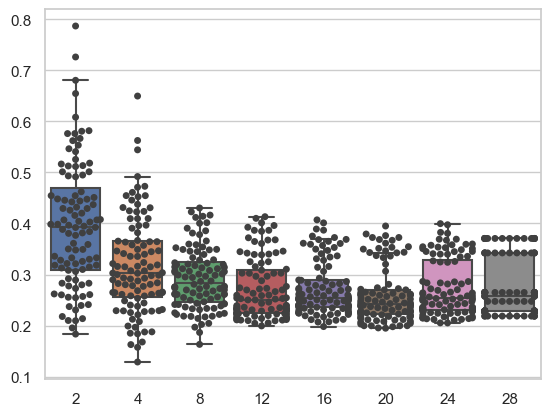

In [362]:
import seaborn as sns
reps = pd.DataFrame(np.array(res_t).T, columns=n_sample_list)
sns.set(style="whitegrid")
fig,ax = plt.subplots()
sns.boxplot(data=reps, showfliers = False, ax=ax)
sns.swarmplot(data=reps, color=".25", ax=ax)
fig

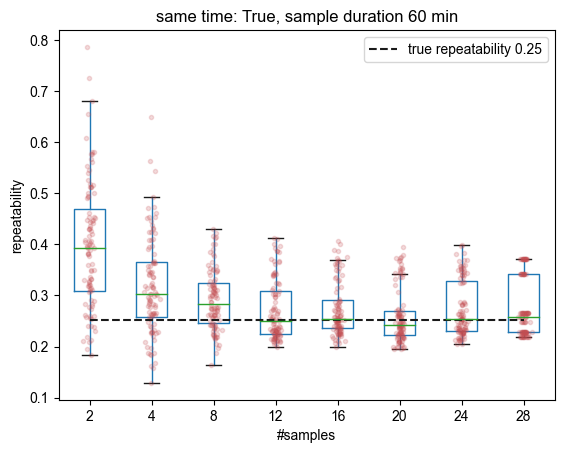

In [361]:
fig

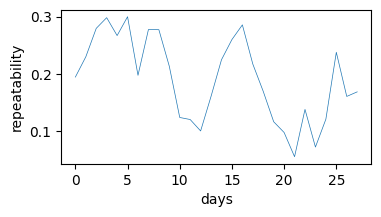

In [18]:
df_r=pd.read_csv(parameters.projectPath+"/repeatability.csv", sep=";")
plot_repeatability(df_r)sample

In [ ]:
df_r=pd.read_csv(parameters.projectPath+"/repeatability_lmm.csv", sep=";")
plot_repeatability(df_r)

In [12]:
df_r=pd.read_csv(parameters.projectPath+"/repeatability_lmm_by_h.csv", sep=";")
fig = plot_repeatability(df_r)
#fig.savefig(parameters.projectPath+"/repeatability_lmm.pdf")


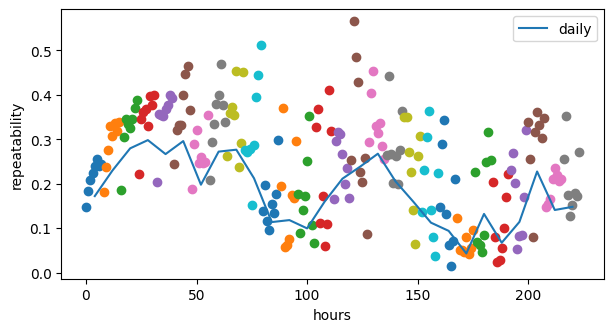

In [6]:
fig

In [128]:
data1 = load_trajectory_data(parameters=parameters,fk="",day=DAYS[0])
table1 = df_table(data1, BLOCK1, fish_keys=FISH_KEYS)

In [210]:
matrix = pd.read_csv(parameters.projectPath+"/avg_step_by_10min.csv", index_col=0)

In [223]:
#matrix
result = get_melted_table(matrix)


In [227]:
rep, lmfit = repeatability_lmm(result)

In [110]:
melted = pd.melt(matrix, id_vars=["block1","block2","minutes"],value_vars=cols, var_name="id", value_name="step")
split_cols = melted['id'].str.split('_', expand=True)
split_cols.columns = ['block', 'cam_id', 'pos']
split_cols['id_cat'] = melted['id'].astype('category').cat.codes
#combine the melted dataframe with the split columns
result = pd.concat([melted, split_cols], axis=1)

In [ ]:
days_b1 = get_days(parameters=parameters,prefix=BLOCK1)
days_b2 = get_days(parameters=parameters,prefix=BLOCK2)
n_days = len(days_b1)
rep_M = np.zeros((n_days, n_days))
for i in range(n_days):
    b1d1,b2d1 = days_b1[i],days_b2[i]
    for j in range(i,n_days):
        b1d2, b2d2 = days_b1[j],days_b2[j]
        copy_results = result.query(
            "block1 == @b1d1 or block1==@b1d2 or block2 == @b2d1 or block2==@b2d2"
        ).copy().dropna()
        rep_M[i,j] = repeatability_lmm(copy_results, group="id_cat")

In [12]:
np.mean(np.array([]))

nan

In [172]:
fig = plot_covariance(rep_M.T, symmetric_bounds=False, title="Repeatability")

In [175]:
pd.DataFrame(rep_M, columns=["day_%d"%(d) for d in range(rep_M.shape[1])], 
             index=["day_%d"%(d) for d in range(rep_M.shape[0])]).to_csv(
    parameters.projectPath+"/repeatability_dxd_10min_avg.csv")
fig.savefig(parameters.projectPath+"/repeatability_dxd_10min_avg.pdf")

In [28]:
matrix1 = matrix[matrix.columns[:24]]
matrix2 = matrix[matrix.columns[24:]]


In [194]:
matrix = pd.read_csv(parameters.projectPath+"/avg_step_by_day.csv")
cov_matrix = matrix[matrix.columns[2:]].T.corr(numeric_only=False)
fig=plot_covariance(cov_matrix, label="day", symmetric_bounds=True)

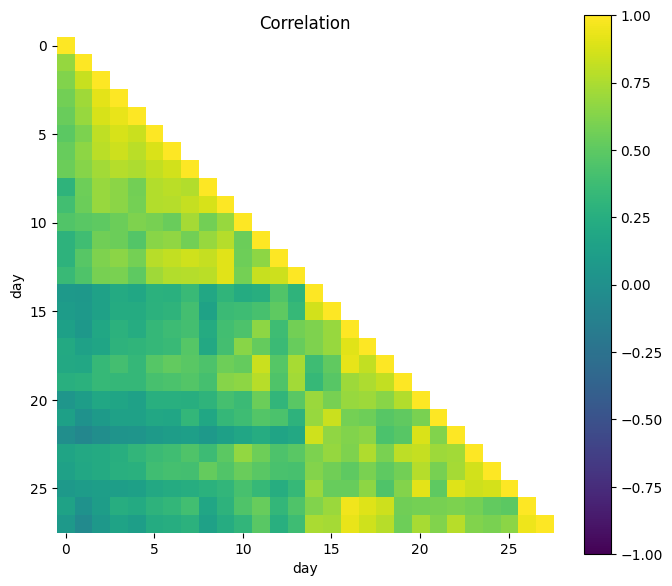

In [195]:
fig

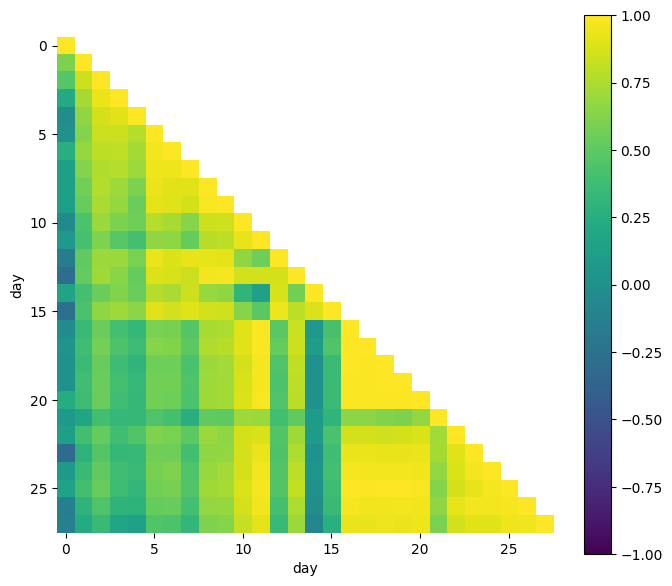

In [29]:
cov_matrix = matrix1[matrix1.columns[2:]].T.corr(numeric_only=False)
fig= plot_covariance(cov_matrix, label="day")
fig

In [206]:
matrix.to_csv(parameters.projectPath+"/avg_step_by_day.csv",index=False)

/Users/lukastaerk/fish/Fish-Tracking-Visualization/src/data_factory/correlations.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(8,7))


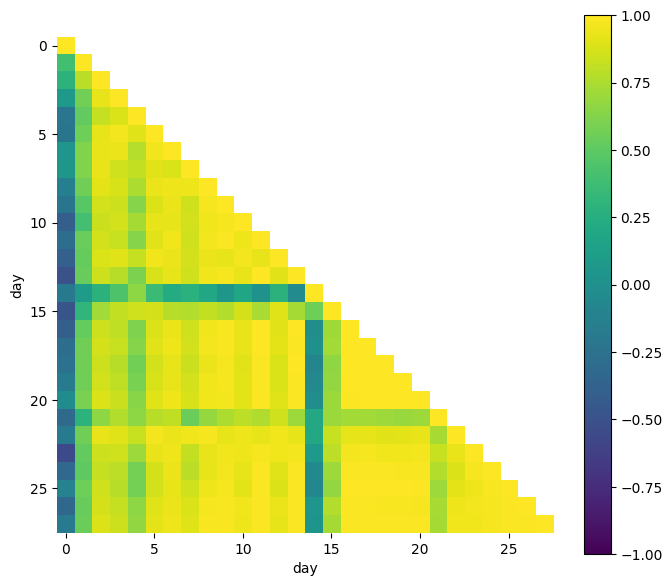

In [59]:
cov_matrix = matrix1[matrix1.columns[13:]].T.corr(numeric_only=False)
fig= plot_covariance(cov_matrix, label="day")
fig

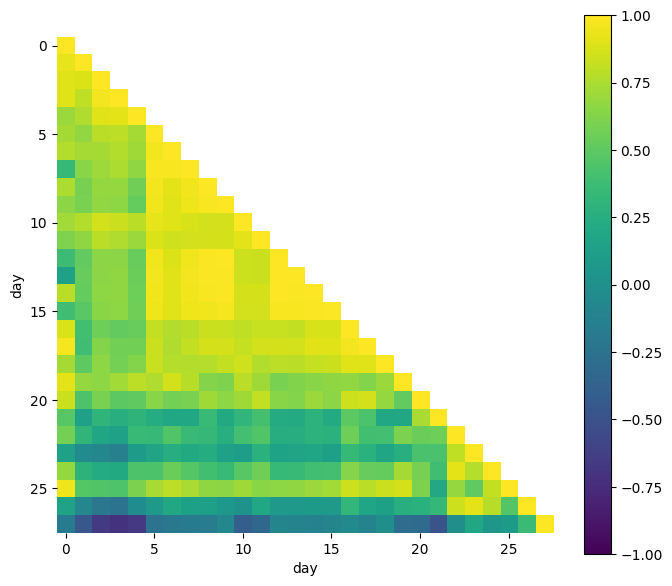

In [58]:
cov_matrix = matrix1[matrix1.columns[2:13]].T.corr(numeric_only=False)
fig= plot_covariance(cov_matrix, label="day")
fig

In [56]:
matrix1.columns[2:12]

Index(['block1_23442333_front', 'block1_23484201_back',
       'block1_23484201_front', 'block1_23484204_back',
       'block1_23484204_front', 'block1_23520257_back',
       'block1_23520257_front', 'block1_23520258_back',
       'block1_23520258_front', 'block1_23520264_back'],
      dtype='object')

In [53]:
plt.close()

In [209]:
from scipy.optimize import minimize
from scipy.stats import norm, lognorm, gamma

# Define the log-likelihood function for the normal distribution
def log_likelihood_normal(params, data):
    mu, sigma = params
    loglik = norm.logpdf(data, loc=mu, scale=sigma).sum()
    return -loglik

# Define the log-likelihood function for the log-normal distribution
def log_likelihood_lognorm(params, data):
    sigma, loc = params
    loglik = lognorm.logpdf(data, s=sigma, loc=loc).sum()
    return -loglik

# Define the log-likelihood function for the gamma distribution
def log_likelihood_gamma(params, data):
    alpha, loc, scale = params
    loglik = gamma.logpdf(data, a=alpha, loc=loc, scale=scale).sum()
    return -loglik

# Estimate the parameters for the normal distribution
params_init = [datadf["step"].mean(), datadf["step"].std()]
params_est_norm = minimize(log_likelihood_normal, params_init, args=(datadf["step"],))
mu_est_norm, sigma_est_norm = params_est_norm.x
print(f"Estimated parameters for the normal distribution: mu = {mu_est_norm}, sigma = {sigma_est_norm}")



Estimated parameters for the normal distribution: mu = 0.5291681193541617, sigma = -1033.541197353024


In [211]:
params_init = [datadf["step"].std(), datadf["step"].mean()]
params_est_lognorm = minimize(log_likelihood_lognorm, params_init, args=(datadf["step"],))
sigma_est_lognorm, loc_est_lognorm = params_est_lognorm.x
print(f"Estimated parameters for the log-normal distribution: sigma = {sigma_est_lognorm}, loc = {loc_est_lognorm}")

Estimated parameters for the log-normal distribution: sigma = 0.6988026469759846, loc = 0.5291681193541617


/usr/local/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


In [213]:
params_init = [1, datadf["step"].mean(), datadf["step"].std()]
params_est_gamma = minimize(log_likelihood_gamma, params_init, args=(datadf["step"],))
alpha_est_gamma, loc_est_gamma, scale_est_gamma = params_est_gamma.x
print(f"Estimated parameters for the gamma distribution: alpha = {alpha_est_gamma}, loc = {loc_est_gamma}, scale = {scale_est_gamma}")

Estimated parameters for the gamma distribution: alpha = 1.0, loc = 0.5291681193541617, scale = 0.6988026469759846


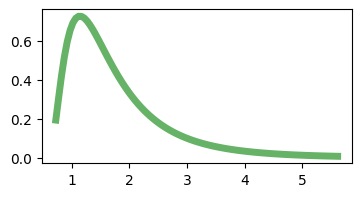

In [235]:
# Plot the log-normal distribution
fig,ax = plt.subplots()
x = np.linspace(lognorm.ppf(0.01, s=sigma_est_lognorm, loc=loc_est_lognorm), lognorm.ppf(0.99, s=sigma_est_lognorm, loc=loc_est_lognorm), 100)
ax.plot(x, lognorm.pdf(x, s=sigma_est_lognorm, loc=loc_est_lognorm), 'g-', lw=5, alpha=0.6, label='lognorm pdf')
fig

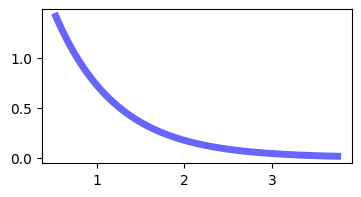

In [234]:
# Plot the gamma distribution
fig,ax = plt.subplots()
x = np.linspace(gamma.ppf(0.01, a=alpha_est_gamma, loc=loc_est_gamma, scale=scale_est_gamma), gamma.ppf(0.99, a=alpha_est_gamma, loc=loc_est_gamma, scale=scale_est_gamma), 100)
ax.plot(x, gamma.pdf(x, a=alpha_est_gamma, loc=loc_est_gamma, scale=scale_est_gamma), 'b-', lw=5, alpha=0.6, label='gamma pdf')
fig

In [10]:
import gpboost as gpb
gp_model = gpb.GPModel(group_data=list(range(45)), likelihood="gaussian")
gp_model.fit(X=datadf["level_0"], y=datadf["step"])
gp_model.summary()

ValueError: Incorrect number of data points in y

In [ ]:
data[0]["fish_key"][0][0]

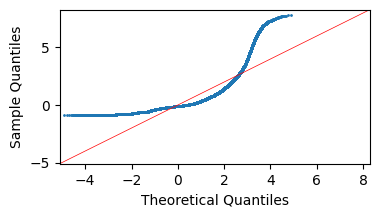

In [59]:
import matplotlib.pyplot as plt

import numpy as np
import statsmodels.api as sm
import pylab
from numpy.lib.stride_tricks import sliding_window_view
sm.qqplot(m_fit.resid, line='45')
#sm.qqplot(np.mean(sliding_window_view(datadf["step"]-0.3, 10),axis=1), line='45')


(array([106.,  43.,  29.,  15.,   8.,   5.,   5.,   5.,   3.,   2.]),
 array([ 5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. , 27.5, 30. ]),
 <BarContainer object of 10 artists>)

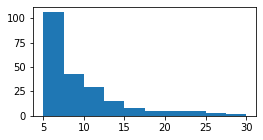

In [54]:
log = pd.read_csv("log_error_block2.csv", sep=";")
plt.hist(log["duration"], range=(5,30))


In [55]:
days = sorted(list(set(log["day"])))

<AxesSubplot:xlabel='day', ylabel='duration'>

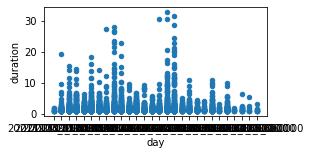

In [56]:
log.plot.scatter("day","duration")

,fish_key,day,duration
152,23520258_front,20211116_060000,259.656667


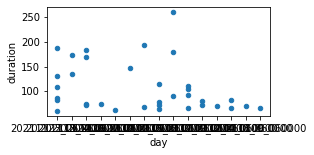

In [59]:
dur = log.groupby(["fish_key","day"]).agg({"duration": "sum"}).reset_index()#
dur[dur["duration"]>60].plot.scatter("day","duration")
dur[dur["duration"]>200]

In [ ]:
log[((log["fish_key"]=="23520258_front") & (log["day"]=="20211116_060000"))]

In [40]:
log["day"]

0       20210922_060000
1       20210922_060000
2       20210920_060000
3       20210923_060000
4       20210926_060000
             ...       
5820    20211006_060000
5821    20211008_060000
5822    20211008_060000
5823    20211008_060000
5824    20211008_060000
Name: day, Length: 5825, dtype: object

In [57]:
uni, c= np.unique(log["xpx"],return_counts=True)

In [70]:
idx_maxs = c.argsort()[::-1][:10]

In [82]:
c[idx_maxs]
idx=idx_maxs[4]

In [83]:
f = (((log["xpx"]-log["xpx"][idx]).abs()<5) & ((log["ypx"]-log["ypx"][idx]).abs()<5))

In [84]:
log[f]

,fish_key,day,duration,xpx,ypx,start_idx,end_idx
297,23484204_back,20210917_060000,5.330000,3040.0,3134.0,123955,125554
1738,23520270_back,20210921_060000,3.210000,3036.0,3138.0,139021,139984
1856,23520270_back,20210930_060000,1.583333,3040.0,3142.0,55345,55820
